# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [49]:
 !pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
    PyYAML (>=5.1.*)
            ~~~~~~^


In [50]:
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [51]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("./../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


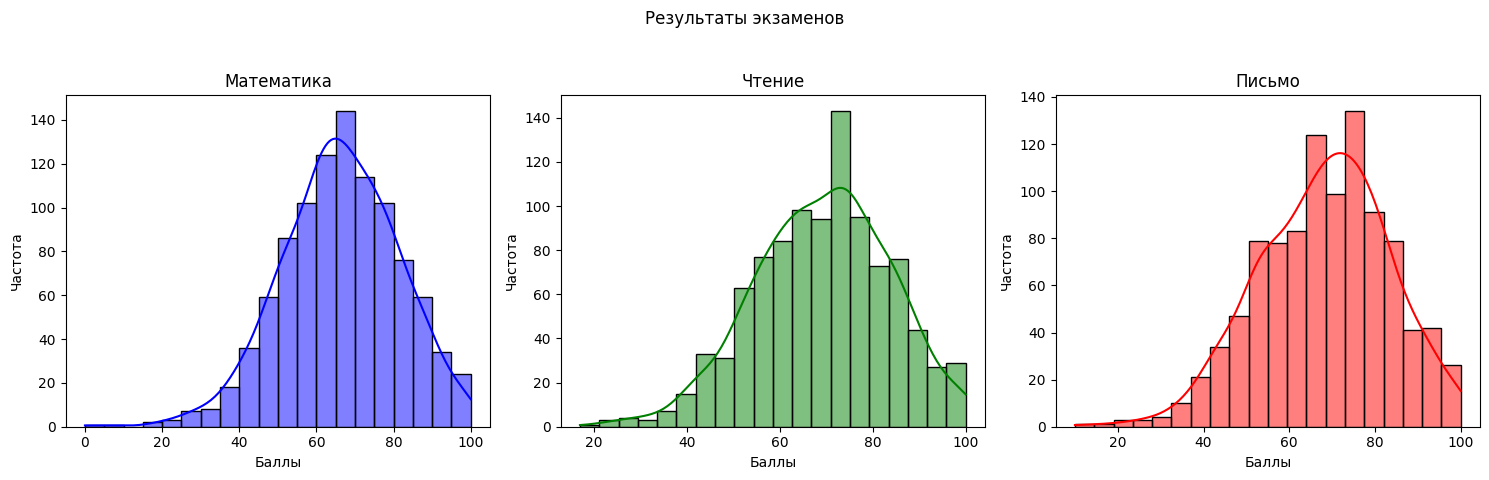

In [52]:
plt.figure(figsize=(15, 5))
plt.suptitle('Результаты экзаменов')

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], bins=20, kde=True, color='blue')
plt.title('Математика')
plt.xlabel('Баллы')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], bins=20, kde=True, color='green')
plt.title('Чтение')
plt.xlabel('Баллы')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], bins=20, kde=True, color='red')
plt.title('Письмо')
plt.xlabel('Баллы')
plt.ylabel('Частота')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [53]:
math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

print(f"""
Медианные значения результатов экзаменов:  
- Математика: `{math_median}`  
- Чтение: `{reading_median}`  
- Письмо: `{writing_median}`
""")


Медианные значения результатов экзаменов:  
- Математика: `66.0`  
- Чтение: `70.0`  
- Письмо: `69.0`



#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


In [54]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Text(0, 0.5, 'Количество студентов')

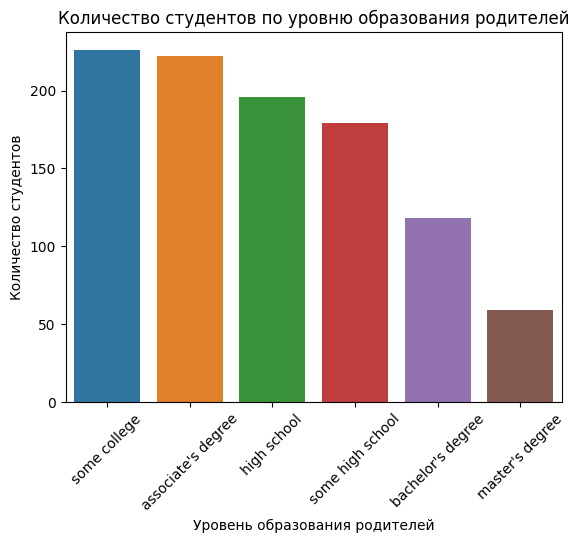

In [55]:
sns.countplot(data=df, x='parental level of education', order=df['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Количество студентов по уровню образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')

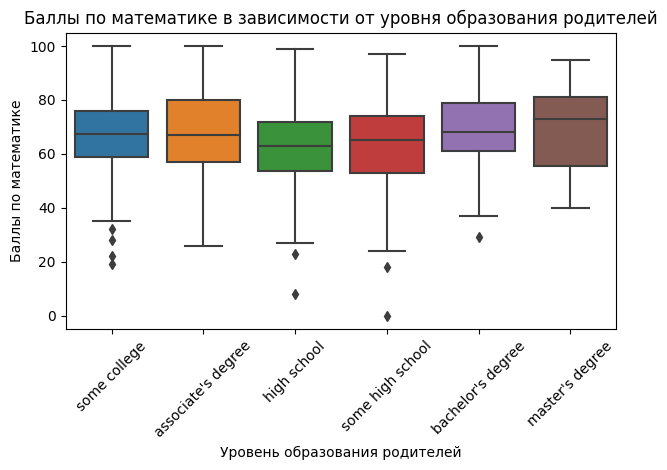

In [56]:
sns.boxplot(data=df, x='parental level of education', y='math score', order=df['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Баллы по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')

plt.tight_layout()
plt.show()

Учащиеся, чьи родители имеют более высокий уровень образования, показывают немного лучшие результаты, чем те, чьи родители имеют более низкий уровень образования. Медианы медиан расположены выше, а минимальные полученные баллы также выше.

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [57]:
high_achievers = df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]
len(high_achievers)

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [58]:
df.groupby('gender').agg({'math score': ['min', 'max', 'median'],
'reading score': ['min', 'max', 'median'],
'writing score': ['min', 'max', 'median']})

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [59]:
df.groupby(['gender', 'lunch', 'test preparation course']).agg({
'math score': 'mean',
'reading score': 'mean',
'writing score': 'mean'
})

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

Студенты, которые получают стандартный обед (`standard`) и проходят подготовку к тесту (`completed`), тенденциозно показывают более высокие результаты по всем предметам. Различия между полями, показывает, что у женщин оценки высще чем мучжин

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

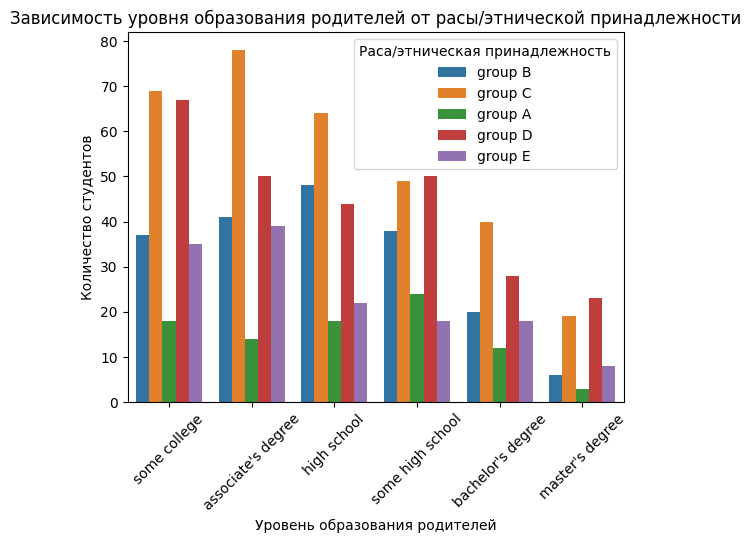

In [60]:
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity', order=df['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.title('Зависимость уровня образования родителей от расы/этнической принадлежности')
plt.legend(title='Раса/этническая принадлежность')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

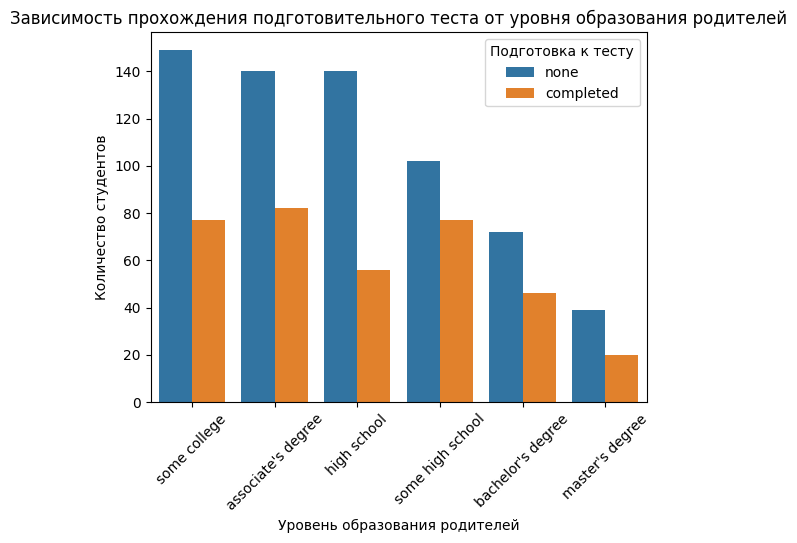

In [61]:
sns.countplot(data=df, x='parental level of education', hue='test preparation course', order=df['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.legend(title='Подготовка к тесту')
plt.show()

In [62]:
high_school_group = df[(df['parental level of education'] == "high school") & (df['test preparation course'] == "completed")]
bachelor_master_group = df[(df['parental level of education'].isin(["bachelor's degree", "master's degree"])) & (df['test preparation course'] == "completed")]

len_high_school = len(high_school_group)
len_bachelor_master = len(bachelor_master_group)

len_high_school, len_bachelor_master

(56, 66)

In [63]:
high_school_total = len(df[df['parental level of education'] == "high school"])
bachelor_master_total = len(df[df['parental level of education'].isin(["bachelor's degree", "master's degree"])])

high_school_percentage = (len_high_school / high_school_total) * 100
bachelor_master_percentage = (len_bachelor_master / bachelor_master_total) * 100

high_school_percentage, bachelor_master_percentage

(28.57142857142857, 37.28813559322034)

Дети, чьи родители получили степень бакалавра/магистра, чаще ходят на подготовительные курсы, чем дети, родители которых закончили только старшую школу

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

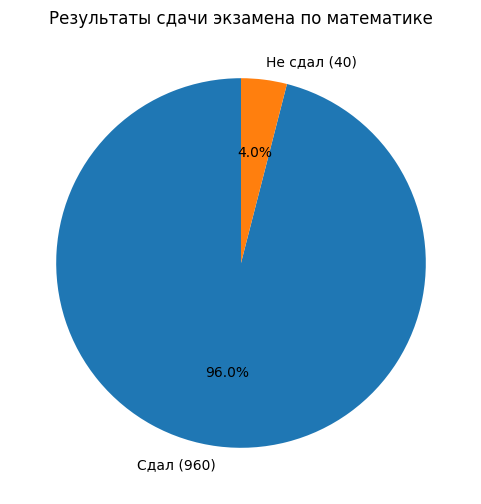

In [64]:
df['math_pass'] = df['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')
math_pass_counts = df['math_pass'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f'{label} ({count})' for label, count in zip(math_pass_counts.index, math_pass_counts)]
math_pass_counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Результаты сдачи экзамена по математике')
plt.ylabel('')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

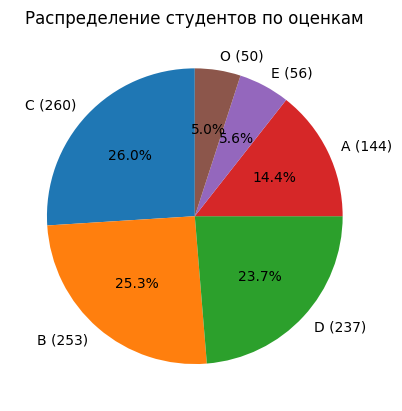

In [65]:
df['total_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def calculate_grade(row):
    if row['math score'] <= 40:
        return 'E'
    if row['total_score'] <= 40:
        return 'E'
    if row['total_score'] <= 60:
        return 'D'
    if row['total_score'] <= 70:
        return 'C'
    if row['total_score'] <= 80:
        return 'B'
    if row['total_score'] <= 90:
        return 'A'
    return 'O'

df['grade'] = df.apply(calculate_grade, axis=1)
grade_counts = df['grade'].value_counts()

labels = [f'{grade} ({count})' for grade, count in zip(grade_counts.index, grade_counts)]
grade_counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Распределение студентов по оценкам')
plt.ylabel('')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

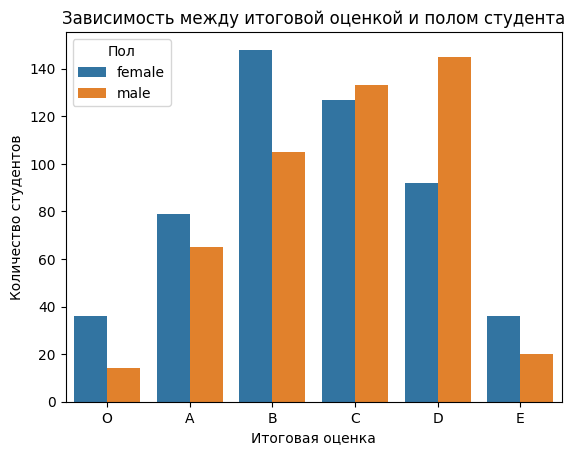

In [66]:
sns.countplot(data=df, x='grade', hue='gender', order=['O', 'A', 'B', 'C', 'D', 'E'])
plt.title('Зависимость между итоговой оценкой и полом студента')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол')
plt.show()

In [67]:
high_grades = df[df['grade'].isin(['O', 'A', 'B'])]
high_grades_gender_counts = high_grades['gender'].value_counts()
high_grades_gender_counts

gender
female    263
male      184
Name: count, dtype: int64

Студенты женского пола получили больше оценок O, A, B